# Diabetes Prediction Project


## Introduction
This Jupyter Notebook presents a diabetes prediction project. The goal of this project is to develop a machine learning model that predicts whether a person has diabetes or not based on certain medical features.

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Data Exploration and Visualization](#data-exploration)
4. [Model Training](#model-training)
5. [Model Evaluation](#model-evaluation)
6. [Prediction](#prediction)
7. [Results Visualization](#results-visualization)
8. [Conclusion](#conclusion)

## 1. Dataset Overview <a name="dataset-overview"></a>
In this section, we load and explore the diabetes dataset.

In [30]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Load the diabetes dataset to a pandas DataFrame
df = pd.read_csv("diabetes.csv")

# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
# number of rows and columns in this data frame
df.shape

(768, 9)

In [33]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Data Preprocessing <a name="data-preprocessing"></a>
In this section, we preprocess the data for training the machine learning model.

In [34]:
# Separate features (X) and target (Y)
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, stratify=Y, random_state=2)


## 3. Data Exploration and Visualization <a name="data-exploration"></a>
Let's explore the dataset and visualize some aspects.

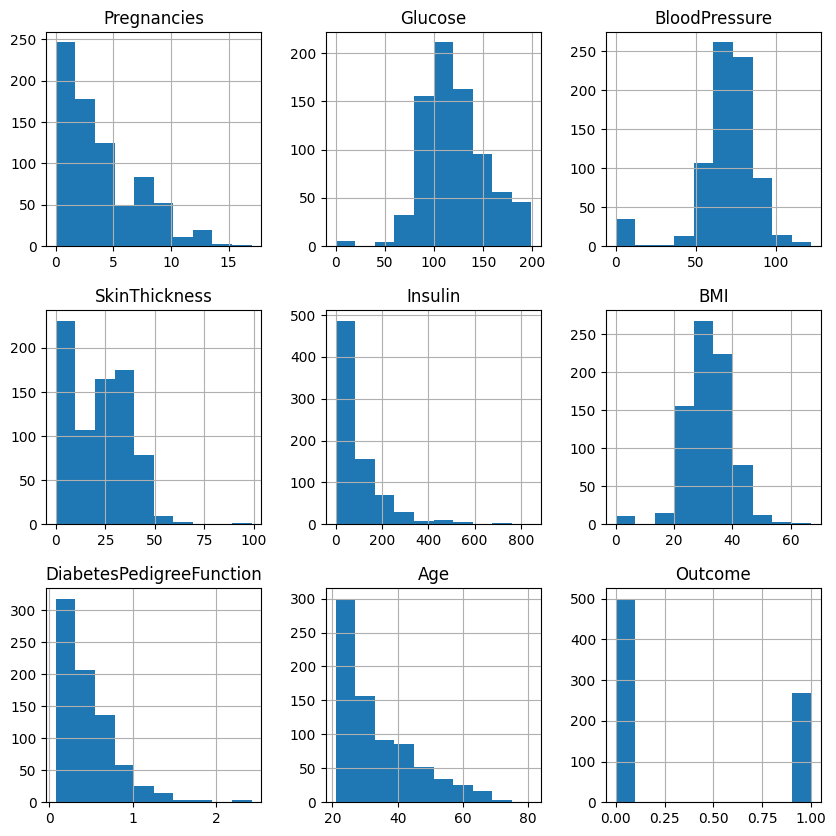

In [35]:
# Histogram of features
df.hist(figsize=(10, 10))
plt.show()

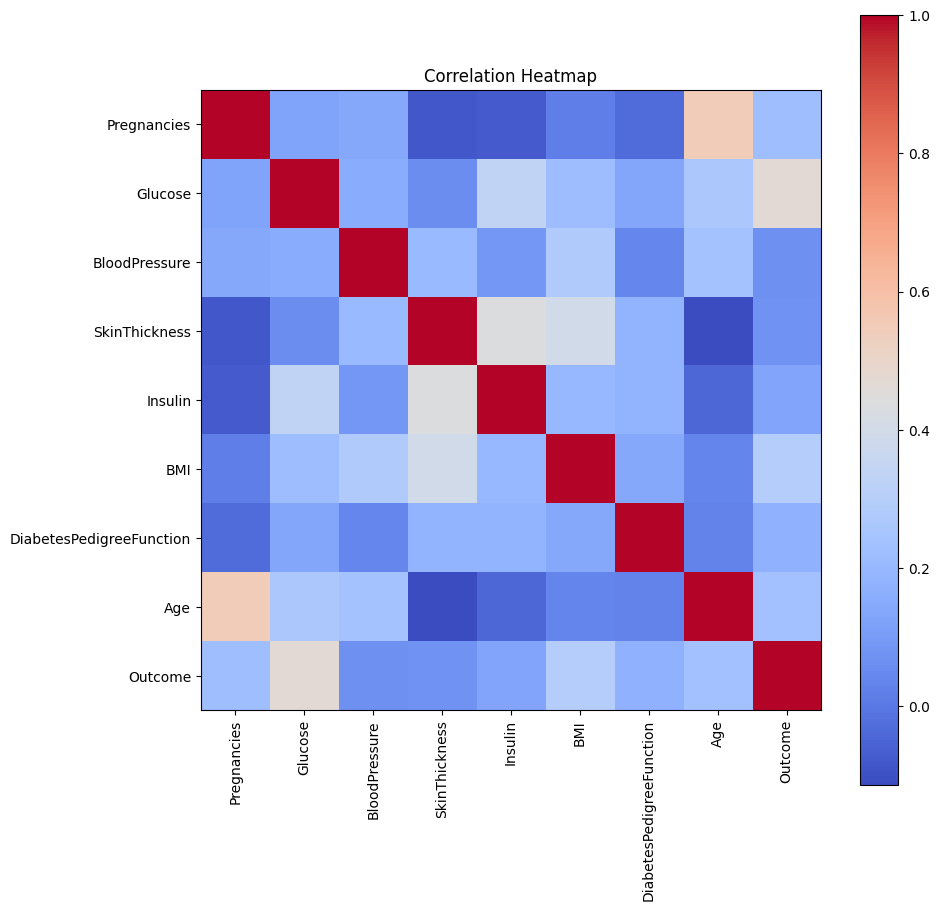

In [36]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap')
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.show()

## 4. Model Training <a name="model-training"></a>
In this section, we train a support vector machine (SVM) classifier.

In [37]:
# Initialize the SVM classifier
classifier = svm.SVC(kernel="linear")

# Train the classifier on the training data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## 5. Model Evaluation <a name="model-evaluation"></a>
Here, we evaluate the model's performance using accuracy.

In [38]:
# Predict on training data
X_train_predicition = classifier.predict(X_train)
training_accuracy = accuracy_score(X_train_predicition, Y_train)

# Predict on testing data
X_test_predicition = classifier.predict(X_test)
testing_accuracy = accuracy_score(X_test_predicition, Y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.7866449511400652
Testing Accuracy: 0.7727272727272727


## 6. Prediction <a name="prediction"></a>
Let's make a prediction for a sample input.

In [42]:
# Input values
pregnancy = 4
glucose = 110
blood_pressure = 92
skin_thickness = 0
insulin = 0
bmi = 37.6
diabetes_pedigree_function = 0.191
age = 30

In [43]:
# Sample input data
input_data = np.array([pregnancy, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]).reshape(1, -1)
input_data_standardized = scaler.transform(input_data)

# Make prediction
prediction = classifier.predict(input_data_standardized)

print("The person is not diabetic") if prediction[0] == 0 else print("The person is diabetic")

The person is not diabetic


/home/rishabh/projects/diabetes-prediction/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 7. Results Visualization <a name="results-visualization"></a>
Visualize the results of our model.

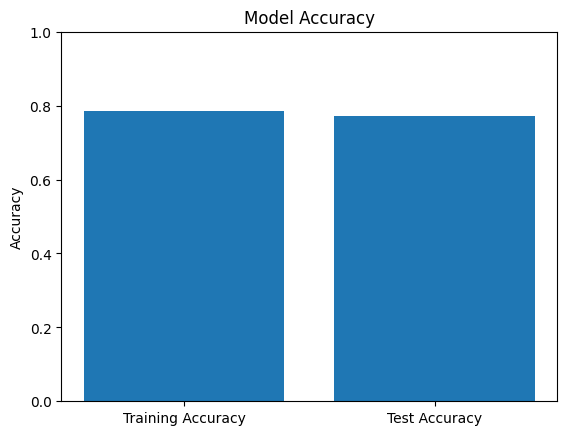

In [44]:
# Bar chart of accuracy
accuracy_data = [training_data_accuracy, test_data_accuracy]
accuracy_labels = ['Training Accuracy', 'Test Accuracy']
plt.bar(accuracy_labels, accuracy_data)
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

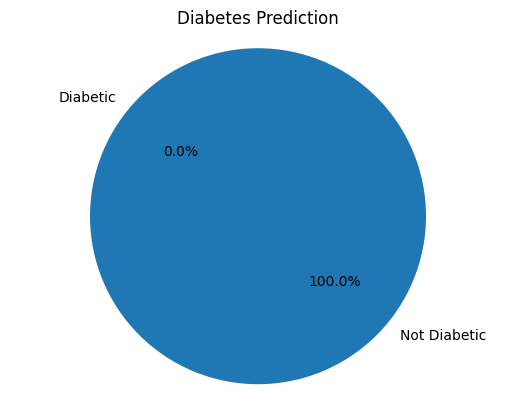

In [45]:
# Pie chart of prediction
prediction_labels = ['Not Diabetic', 'Diabetic']
prediction_values = [1 - prediction[0], prediction[0]]
plt.pie(prediction_values, labels=prediction_labels, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Prediction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 8. Conclusion <a name="conclusion"></a>
This notebook presented a diabetes prediction project using a support vector machine classifier. It covered data exploration, preprocessing, model training, evaluation, and visualization. Further improvements and enhancements can be made, such as exploring other algorithms, tuning hyperparameters, and creating a user-friendly interface.